In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

DG_data = pd.read_csv("Dilshad_Garden_Data.csv")
AV_data = pd.read_csv("Anand_Vihar_Data.csv")

DG_data.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')

In [5]:
DG_data.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01,169.57,305.14,28.77,29.65,38.54,62.22,52.05,0.77,33.90,...,2.06,NaN,78.67,1.22,133.79,NaN,0.0,33.45,NaN,-0.22
1,2024-01-02,148.21,288.49,29.95,27.63,38.40,59.98,29.71,0.78,32.73,...,2.06,NaN,73.04,1.13,131.23,NaN,0.0,42.14,NaN,-0.22
2,2024-01-03,142.83,266.59,31.23,29.64,40.49,56.22,25.18,1.14,32.70,...,2.04,NaN,91.74,1.05,152.68,NaN,0.0,24.69,NaN,-0.25
3,2024-01-04,183.10,343.50,37.54,33.01,47.30,56.74,21.95,0.88,36.09,...,2.05,NaN,88.92,1.13,86.84,NaN,0.0,21.57,NaN,-0.26
4,2024-01-05,143.22,254.06,36.58,33.53,46.82,40.75,31.97,0.55,28.09,...,3.29,NaN,94.04,1.02,109.93,NaN,0.0,12.37,NaN,-0.26


In [6]:
AV_data.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01,199.56,335.12,38.99,56.29,61.65,18.28,9.33,1.60,17.08,...,NaN,11.83,75.30,0.41,60.27,NaN,0.0,127.21,741.94,NaN
1,2024-01-02,195.91,320.67,46.46,62.58,71.07,19.42,22.19,1.77,17.98,...,NaN,11.54,72.11,0.54,54.18,NaN,0.0,135.27,741.98,NaN
2,2024-01-03,247.44,360.37,69.63,71.08,94.41,25.29,16.65,2.18,15.52,...,NaN,10.76,84.56,0.51,38.12,NaN,0.0,119.43,742.00,NaN
3,2024-01-04,274.06,436.22,91.01,71.07,111.79,34.86,10.11,1.86,14.38,...,NaN,11.54,81.26,0.32,96.44,NaN,0.0,111.25,741.96,NaN
4,2024-01-05,218.28,345.98,66.03,59.13,85.10,42.52,11.37,2.20,15.25,...,NaN,12.01,84.88,0.32,51.01,NaN,0.0,79.26,742.00,NaN


In [7]:
# data = data.drop(["O Xylene (µg/m³)"], axis=1)
DG_new = DG_data.drop(["O Xylene (µg/m³)", "AT (°C)", "RF (mm)", "BP (mmHg)"], axis=1)
DG_new.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'RH (%)', 'WS (m/s)',
       'WD (deg)', 'TOT-RF (mm)', 'SR (W/mt2)', 'VWS (m/s)'],
      dtype='object')

In [8]:
AV_new = AV_data.drop(["Xylene (µg/m³)","O Xylene (µg/m³)","Eth-Benzene (µg/m³)","MP-Xylene (µg/m³)","RF (mm)", "VWS (m/s)"], axis=1)
AV_new.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'AT (°C)',
       'RH (%)', 'WS (m/s)', 'WD (deg)', 'TOT-RF (mm)', 'SR (W/mt2)',
       'BP (mmHg)'],
      dtype='object')

In [9]:
print(DG_new.shape)

finalDG = DG_new.dropna()
print(finalDG.shape)
finalDG.info()

(294, 21)
(294, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            294 non-null    object 
 1   PM2.5 (µg/m³)        294 non-null    float64
 2   PM10 (µg/m³)         294 non-null    float64
 3   NO (µg/m³)           294 non-null    float64
 4   NO2 (µg/m³)          294 non-null    float64
 5   NOx (ppb)            294 non-null    float64
 6   NH3 (µg/m³)          294 non-null    float64
 7   SO2 (µg/m³)          294 non-null    float64
 8   CO (mg/m³)           294 non-null    float64
 9   Ozone (µg/m³)        294 non-null    float64
 10  Benzene (µg/m³)      294 non-null    float64
 11  Toluene (µg/m³)      294 non-null    float64
 12  Xylene (µg/m³)       294 non-null    float64
 13  Eth-Benzene (µg/m³)  294 non-null    float64
 14  MP-Xylene (µg/m³)    294 non-null    float64
 15  RH (%)              

In [10]:
print(AV_new.shape)

finalAV = AV_new.dropna()
print(finalAV.shape)
finalAV.info()

(294, 19)
(252, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 0 to 293
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        252 non-null    object 
 1   PM2.5 (µg/m³)    252 non-null    float64
 2   PM10 (µg/m³)     252 non-null    float64
 3   NO (µg/m³)       252 non-null    float64
 4   NO2 (µg/m³)      252 non-null    float64
 5   NOx (ppb)        252 non-null    float64
 6   NH3 (µg/m³)      252 non-null    float64
 7   SO2 (µg/m³)      252 non-null    float64
 8   CO (mg/m³)       252 non-null    float64
 9   Ozone (µg/m³)    252 non-null    float64
 10  Benzene (µg/m³)  252 non-null    float64
 11  Toluene (µg/m³)  252 non-null    float64
 12  AT (°C)          252 non-null    float64
 13  RH (%)           252 non-null    float64
 14  WS (m/s)         252 non-null    float64
 15  WD (deg)         252 non-null    float64
 16  TOT-RF (mm)      252 non-null    float64
 17  S

## Time series analysis

### PM 2.5 (Dilshad Garden)

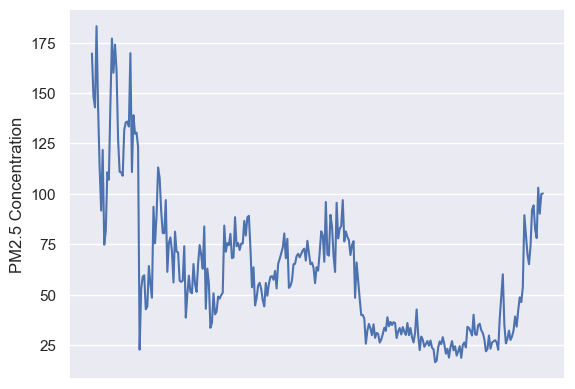

In [11]:
X = np.array(finalDG["Timestamp"])
Y = np.array(finalDG["PM2.5 (µg/m³)"])

sns.set_theme()
line = plt.plot(X,Y)
plt.xticks([])
plt.ylabel("PM2.5 Concentration")

plt.show()

### Insights

In [12]:
# max pm2.5 and when
# min pm 2.5 and when
# mean pm2.5
# is it good?
# what's the trend observed?

### PM 2.5 (Anand Vihar)

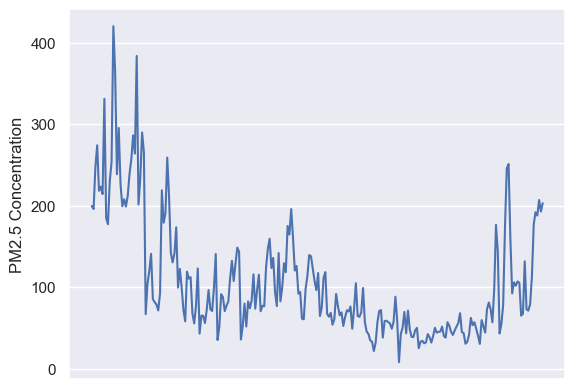

In [13]:
X = np.array(finalAV["Timestamp"])
Y = np.array(finalAV["PM2.5 (µg/m³)"])

sns.set_theme()
line = plt.plot(X,Y)
plt.xticks([])
plt.ylabel("PM2.5 Concentration")

plt.show()

### Insights

In [14]:
# max pm2.5 and when
# min pm 2.5 and when
# mean pm2.5
# is it good?
# what's the trend observed?

### PM 10 (Dilshad Garden)

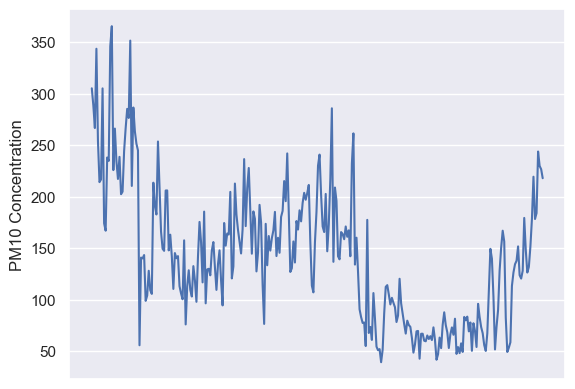

In [15]:
X = np.array(finalDG["Timestamp"])
Y = np.array(finalDG["PM10 (µg/m³)"])

sns.set_theme()
plt.plot(X,Y)
plt.xticks([])
plt.ylabel("PM10 Concentration")

plt.show()

### Insights

In [16]:
# max pm10 and when
# min pm10 and when
# mean pm10
# is it good?
# what's the trend observed?

### PM 10 (Anand Vihar)

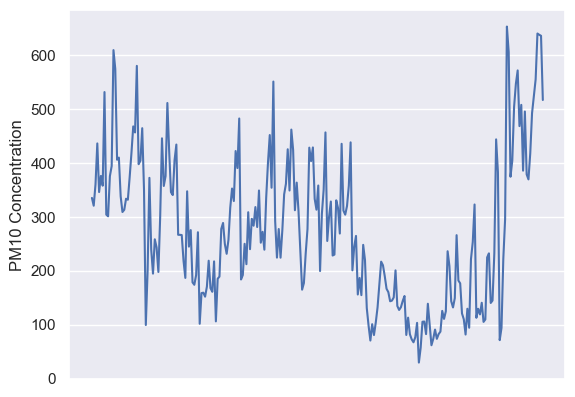

In [17]:
X = np.array(finalAV["Timestamp"])
Y = np.array(finalAV["PM10 (µg/m³)"])

sns.set_theme()
plt.plot(X,Y)
plt.xticks([])
plt.ylabel("PM10 Concentration")

plt.show()

### Insights

In [18]:
# max pm10 and when
# min pm10 and when
# mean pm10
# is it good?
# what's the trend observed?

## NO, NO2, NOx, SO2, CO, Ozone Comparisons (Dilshad Garden)

### 1. NO vs NO2 Dual Line plot

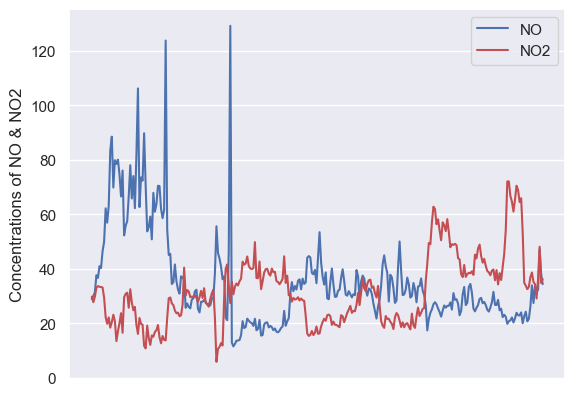

In [19]:
X = np.array(finalDG["Timestamp"])
NO = np.array(finalDG["NO (µg/m³)"])
NO2 = np.array(finalDG["NO2 (µg/m³)"])
NOx = np.array(finalDG["NOx (ppb)"])
SO2 = np.array(finalDG["SO2 (µg/m³)"])
CO = np.array(finalDG["CO (mg/m³)"])
Ozone = np.array(finalDG["Ozone (µg/m³)"])

plt.plot(X,NO, "-b", label="NO")
plt.plot(X,NO2, "-r", label="NO2")
plt.ylabel("Concentrations of NO & NO2")
plt.xticks([])
plt.legend()

sns.set_theme()
plt.xticks([])


plt.show()

### 2. SO2 vs CO Dual line plot

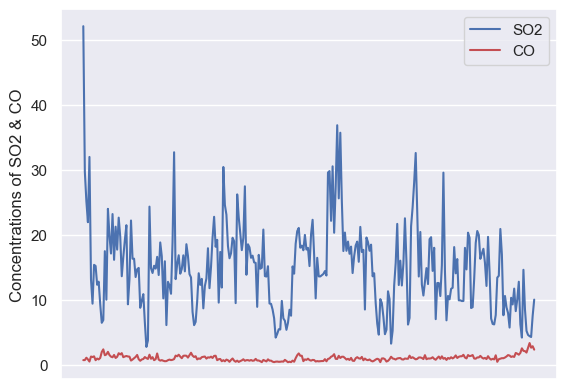

In [20]:
plt.plot(X,SO2, "-b", label="SO2")
plt.plot(X,CO, "-r", label="CO")
plt.ylabel("Concentrations of SO2 & CO")
plt.xticks([])
plt.legend()

plt.show()

### 3. NOx and Ozone Dual Line plot

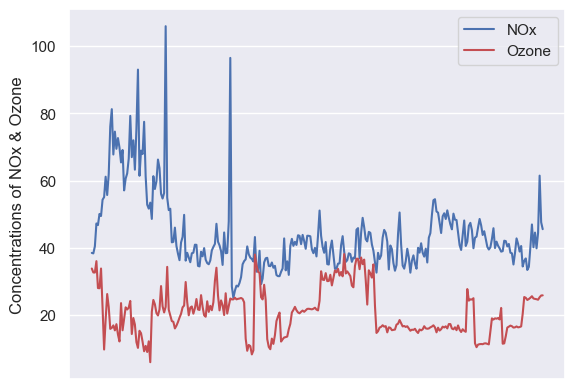

In [21]:
plt.plot(X,NOx, "-b", label="NOx")
plt.plot(X,Ozone, "-r", label="Ozone")
plt.ylabel("Concentrations of NOx & Ozone")
plt.xticks([])
plt.legend()

plt.show()

## NO, NO2, NOx, SO2, CO, Ozone Comparisons (Dilshad Garden)

### 1. NO vs NO2 Dual Line plot

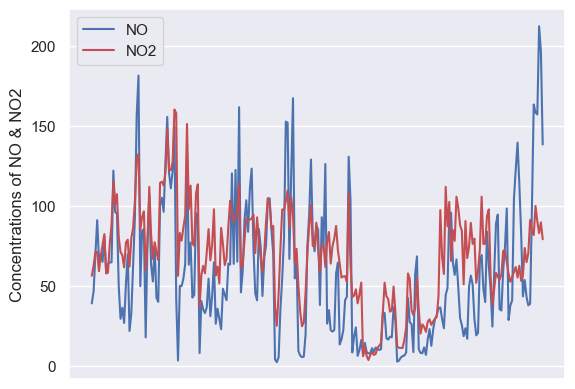

In [22]:
X = np.array(finalAV["Timestamp"])
NO = np.array(finalAV["NO (µg/m³)"])
NO2 = np.array(finalAV["NO2 (µg/m³)"])
NOx = np.array(finalAV["NOx (ppb)"])
SO2 = np.array(finalAV["SO2 (µg/m³)"])
CO = np.array(finalAV["CO (mg/m³)"])
Ozone = np.array(finalAV["Ozone (µg/m³)"])

plt.plot(X,NO, "-b", label="NO")
plt.plot(X,NO2, "-r", label="NO2")
plt.ylabel("Concentrations of NO & NO2")
plt.xticks([])
plt.legend()

sns.set_theme()
plt.xticks([])


plt.show()

### 2. SO2 vs CO Dual line plot

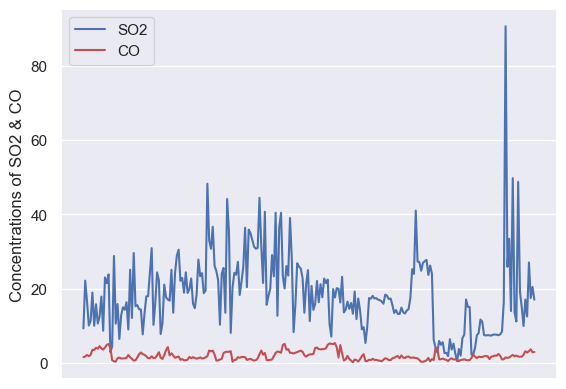

In [23]:
plt.plot(X,SO2, "-b", label="SO2")
plt.plot(X,CO, "-r", label="CO")
plt.ylabel("Concentrations of SO2 & CO")
plt.xticks([])
plt.legend()

plt.show()

### 3. NOx and Ozone Dual Line plot

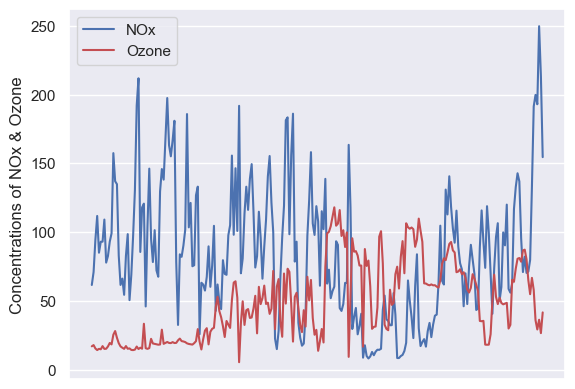

In [24]:
plt.plot(X,NOx, "-b", label="NOx")
plt.plot(X,Ozone, "-r", label="Ozone")
plt.ylabel("Concentrations of NOx & Ozone")
plt.xticks([])
plt.legend()

plt.show()

## Pollutant Composition (Dilshad Garden)

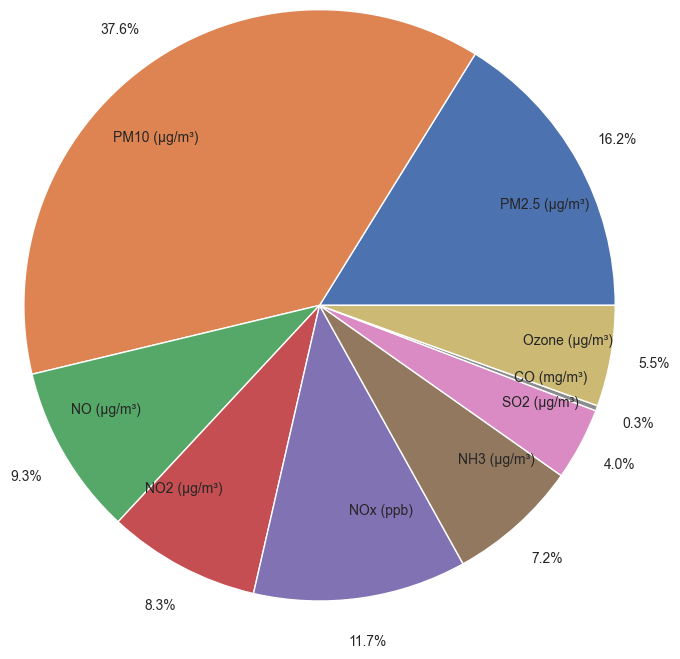

In [25]:
desc = finalDG.describe()
# extracting the mean of all pollutants

mean = desc.loc["mean"]
values = mean.values.round(2).tolist()
indexes = mean.index.tolist()

labels = indexes[:9]
fig, ax = plt.subplots()
ax.pie(values[:9], labels=labels, autopct='%1.1f%%',pctdistance=1.15, labeldistance=.7,textprops={'size': 'smaller'}, radius=2.0)


plt.show()



## Pollutant Composition (Anand Vihar)

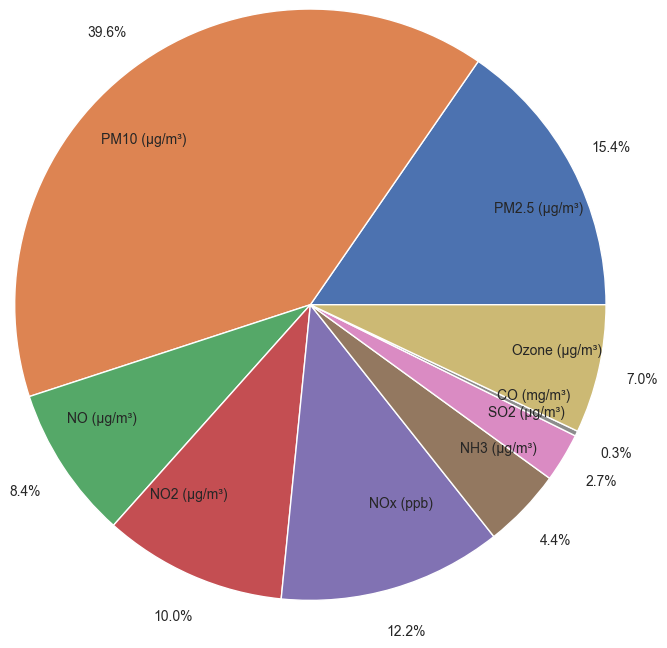

In [26]:
desc = finalAV.describe()
# extracting the mean of all pollutants

mean = desc.loc["mean"]
values = mean.values.round(2).tolist()
indexes = mean.index.tolist()

labels = indexes[:9]
fig, ax = plt.subplots()
ax.pie(values[:9], labels=labels, autopct='%1.1f%%',pctdistance=1.15, labeldistance=.7,textprops={'size': 'smaller'}, radius=2.0)


plt.show()



## Heatmap of Pollutants (Dilshad Garden)

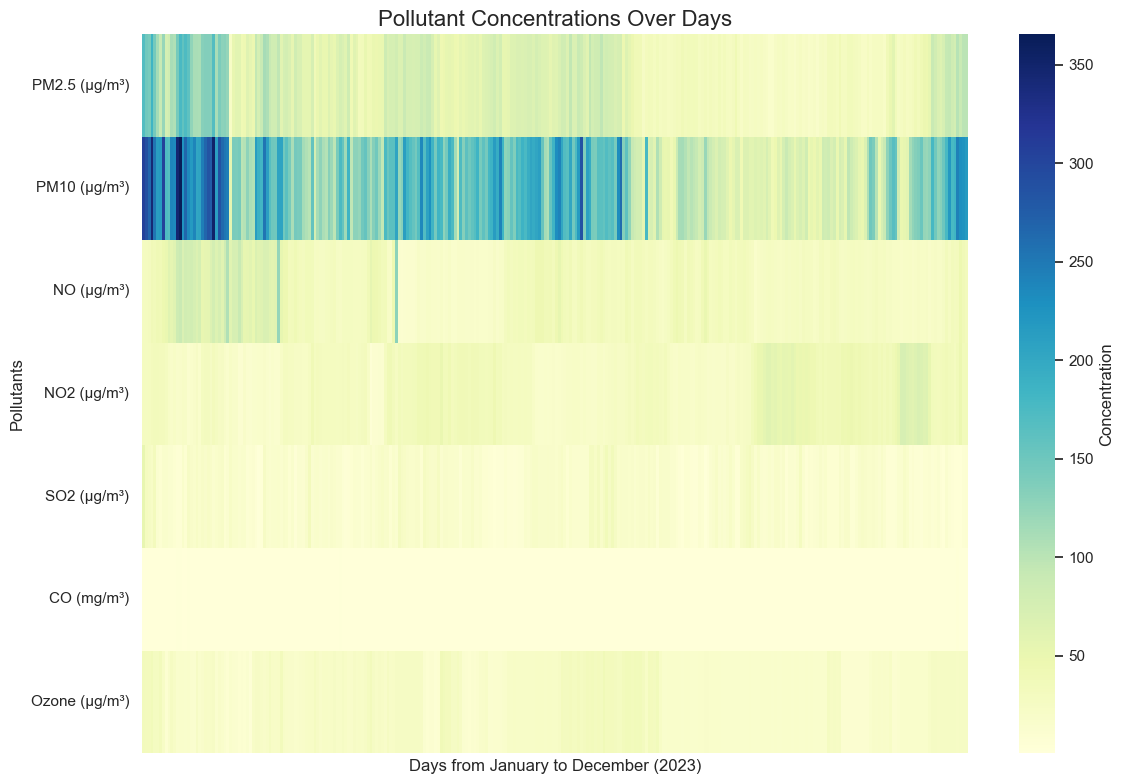

In [27]:
pollutants = ["PM2.5 (µg/m³)", "PM10 (µg/m³)", "NO (µg/m³)", "NO2 (µg/m³)", "SO2 (µg/m³)", "CO (mg/m³)", "Ozone (µg/m³)"]
heatmapData = finalDG[["Timestamp"] + pollutants]  
heatmapData.set_index("Timestamp", inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmapData.T, cmap="YlGnBu", cbar_kws={"label": "Concentration"})

plt.title("Pollutant Concentrations Over Days", fontsize=16)
plt.xlabel("Days from January to December (2023)", fontsize=12)
plt.ylabel("Pollutants", fontsize=12)
plt.xticks([])
plt.tight_layout()
plt.show()


## Heatmap of Pollutants (Anand Vihar)

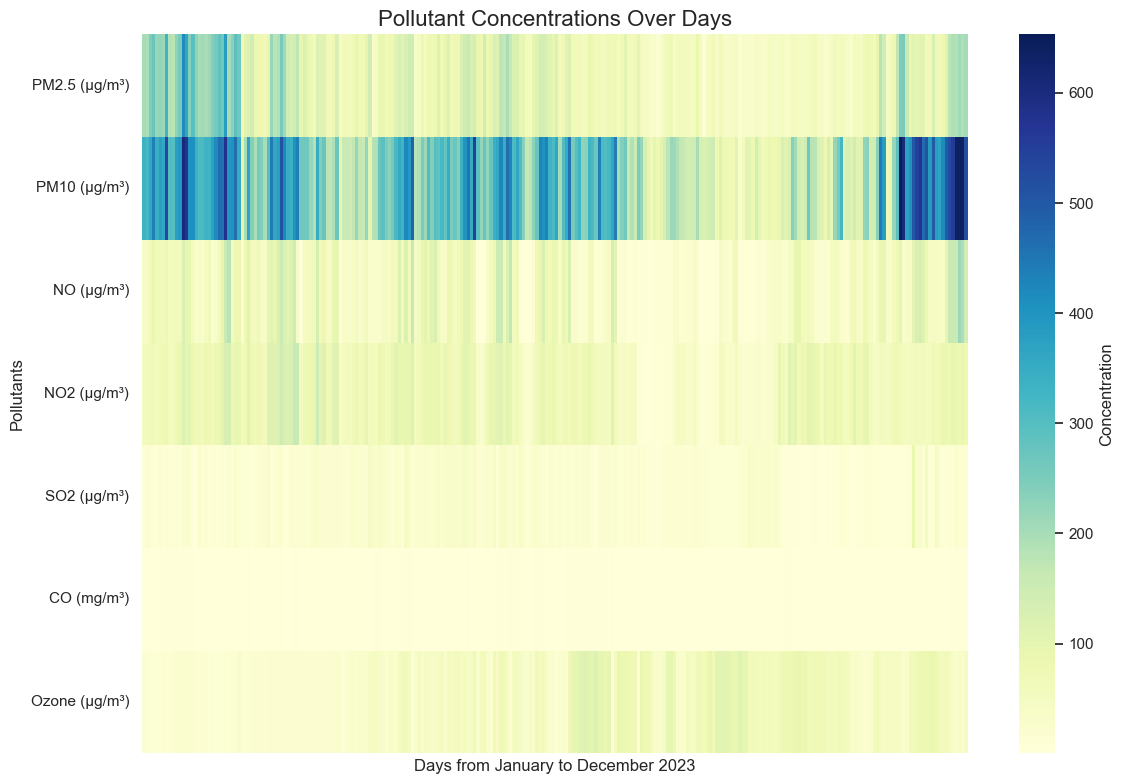

In [28]:
pollutants = ["PM2.5 (µg/m³)", "PM10 (µg/m³)", "NO (µg/m³)", "NO2 (µg/m³)", "SO2 (µg/m³)", "CO (mg/m³)", "Ozone (µg/m³)"]
heatmapData = finalAV[["Timestamp"] + pollutants]  
heatmapData.set_index("Timestamp", inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmapData.T, cmap="YlGnBu", cbar_kws={"label": "Concentration"})

plt.title("Pollutant Concentrations Over Days", fontsize=16)
plt.xlabel("Days from January to December 2023", fontsize=12)
plt.ylabel("Pollutants", fontsize=12)
plt.xticks([])
plt.tight_layout()
plt.show()


# Correlation Analysis

## 1. Correlation Matrix Heatmap (Dilshad Garden)

               PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
PM2.5 (µg/m³)       1.000000      0.900824    0.503359    -0.345963   
PM10 (µg/m³)        0.900824      1.000000    0.418846    -0.282026   
NO (µg/m³)          0.503359      0.418846    1.000000    -0.536024   
NO2 (µg/m³)        -0.345963     -0.282026   -0.536024     1.000000   
NOx (ppb)           0.442926      0.365017    0.914618    -0.191452   
NH3 (µg/m³)         0.335775      0.283646    0.197636    -0.285212   
SO2 (µg/m³)         0.172610      0.055639   -0.020161    -0.120016   
CO (mg/m³)          0.249476      0.189879    0.246487     0.038505   
Ozone (µg/m³)       0.257865      0.249020   -0.037149    -0.214556   

               NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  
PM2.5 (µg/m³)   0.442926     0.335775     0.172610    0.249476       0.257865  
PM10 (µg/m³)    0.365017     0.283646     0.055639    0.189879       0.249020  
NO (µg/m³)      0.914618     0.197636    -0.02016

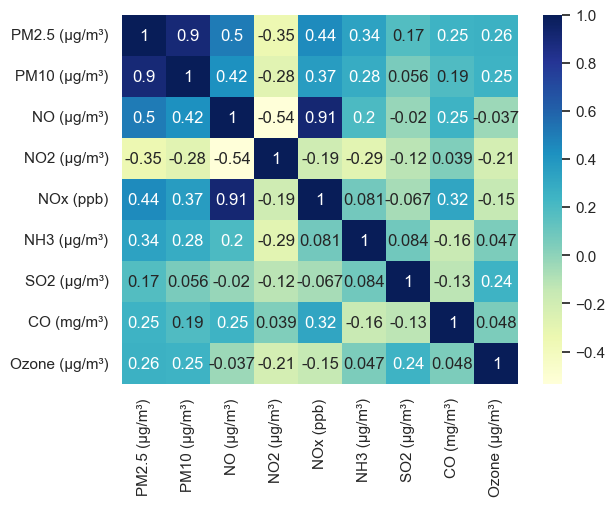

In [30]:
key_cols = finalDG.iloc[:, 0:10]
print(key_cols.corr(numeric_only=True))
dataplot = sns.heatmap(key_cols.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

## 2. Correlation Matrix Heatmap (Anand Vihar)

               PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
PM2.5 (µg/m³)       1.000000      0.758038    0.514163     0.468795   
PM10 (µg/m³)        0.758038      1.000000    0.699023     0.522485   
NO (µg/m³)          0.514163      0.699023    1.000000     0.705804   
NO2 (µg/m³)         0.468795      0.522485    0.705804     1.000000   
NOx (ppb)           0.519014      0.682347    0.969743     0.832877   
NH3 (µg/m³)         0.373511      0.316491    0.320279     0.322962   
SO2 (µg/m³)         0.012089      0.197123    0.139229     0.050631   
CO (mg/m³)          0.339331      0.458620    0.350554     0.320887   
Ozone (µg/m³)      -0.485641     -0.262388   -0.312274    -0.381298   

               NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  
PM2.5 (µg/m³)   0.519014     0.373511     0.012089    0.339331      -0.485641  
PM10 (µg/m³)    0.682347     0.316491     0.197123    0.458620      -0.262388  
NO (µg/m³)      0.969743     0.320279     0.13922

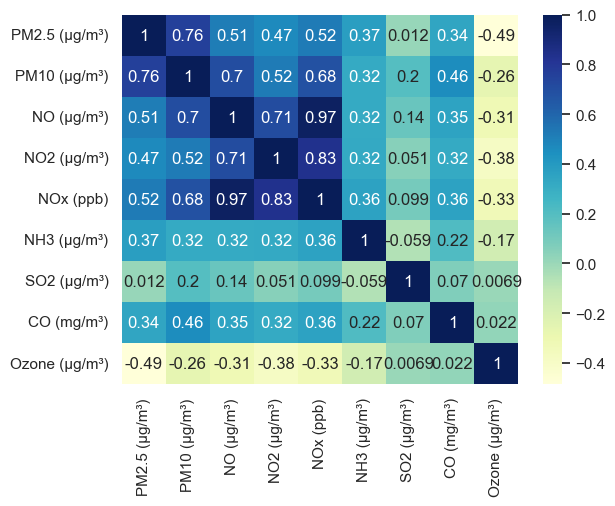

In [31]:
key_cols = finalAV.iloc[:, 0:10]
print(key_cols.corr(numeric_only=True))
dataplot = sns.heatmap(key_cols.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

## 3. PM2.5 vs PM10 Scatterplot (Dilshad Garden)

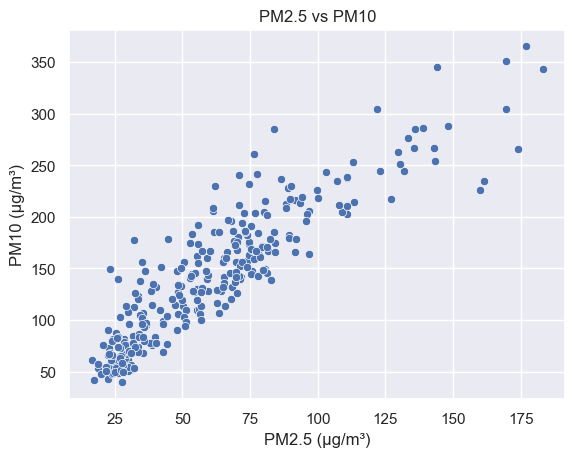

In [33]:
pm10 = np.array(finalDG["PM10 (µg/m³)"])
pm2dec5 = np.array(finalDG["PM2.5 (µg/m³)"])

sns.scatterplot(data=finalDG, x=pm2dec5, y=pm10)
plt.title("PM2.5 vs PM10")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("PM10 (µg/m³)")
plt.show()

## 4. PM2.5 vs PM10 Scatterplot (Anand Vihar)

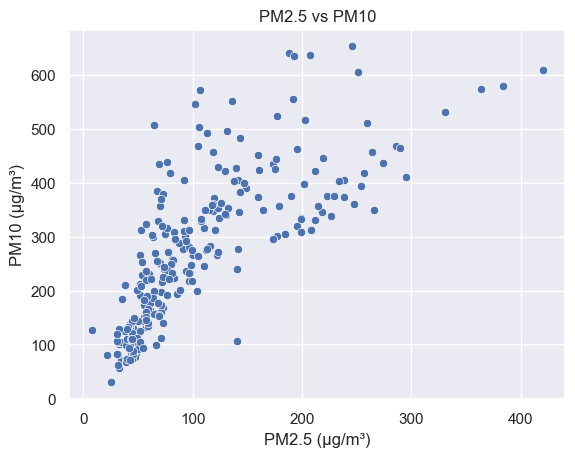

In [36]:
pm10 = np.array(finalAV["PM10 (µg/m³)"])
pm2dec5 = np.array(finalAV["PM2.5 (µg/m³)"])

sns.scatterplot(data=finalAV, x=pm2dec5, y=pm10)
plt.title("PM2.5 vs PM10")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("PM10 (µg/m³)")
plt.show()

## 5. NO2 vs Ozone Scatterplot (Dilshad Garden)

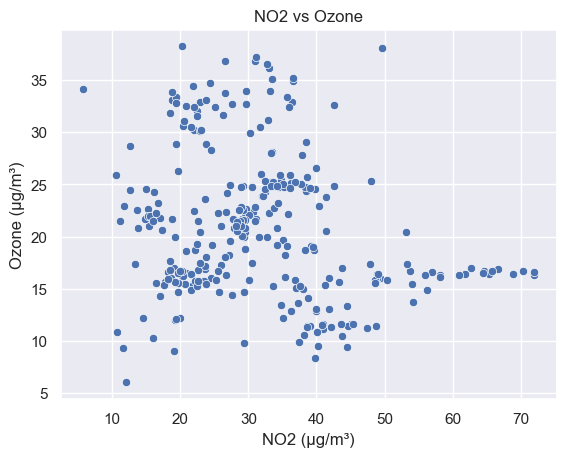

In [34]:
NO2 = np.array(finalDG["NO2 (µg/m³)"])
ozone = np.array(finalDG["Ozone (µg/m³)"])

sns.scatterplot(data=finalDG, x=NO2, y=ozone)
plt.title("NO2 vs Ozone")
plt.xlabel("NO2 (µg/m³)")
plt.ylabel("Ozone (µg/m³)")
plt.show()

## 6. NO2 vs Ozone Scatterplot (Dilshad Garden)

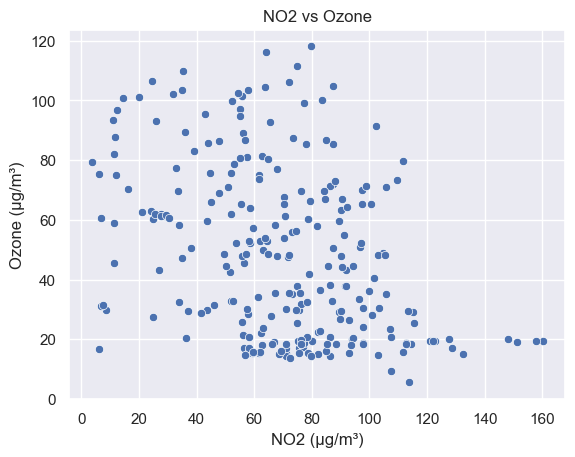

In [39]:
NO2 = np.array(finalAV["NO2 (µg/m³)"])
ozone = np.array(finalAV["Ozone (µg/m³)"])

sns.scatterplot(data=finalAV, x=NO2, y=ozone)
plt.title("NO2 vs Ozone")
plt.xlabel("NO2 (µg/m³)")
plt.ylabel("Ozone (µg/m³)")
plt.show()

# Distribution of AQI Values

## 1. Boxplot (Dilshad Garden)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'PM2.5 (µg/m³)'),
  Text(1, 0, 'PM10 (µg/m³)'),
  Text(2, 0, 'NO (µg/m³)'),
  Text(3, 0, 'NO2 (µg/m³)'),
  Text(4, 0, 'NOx (ppb)'),
  Text(5, 0, 'NH3 (µg/m³)'),
  Text(6, 0, 'SO2 (µg/m³)'),
  Text(7, 0, 'CO (mg/m³)'),
  Text(8, 0, 'Ozone (µg/m³)')])

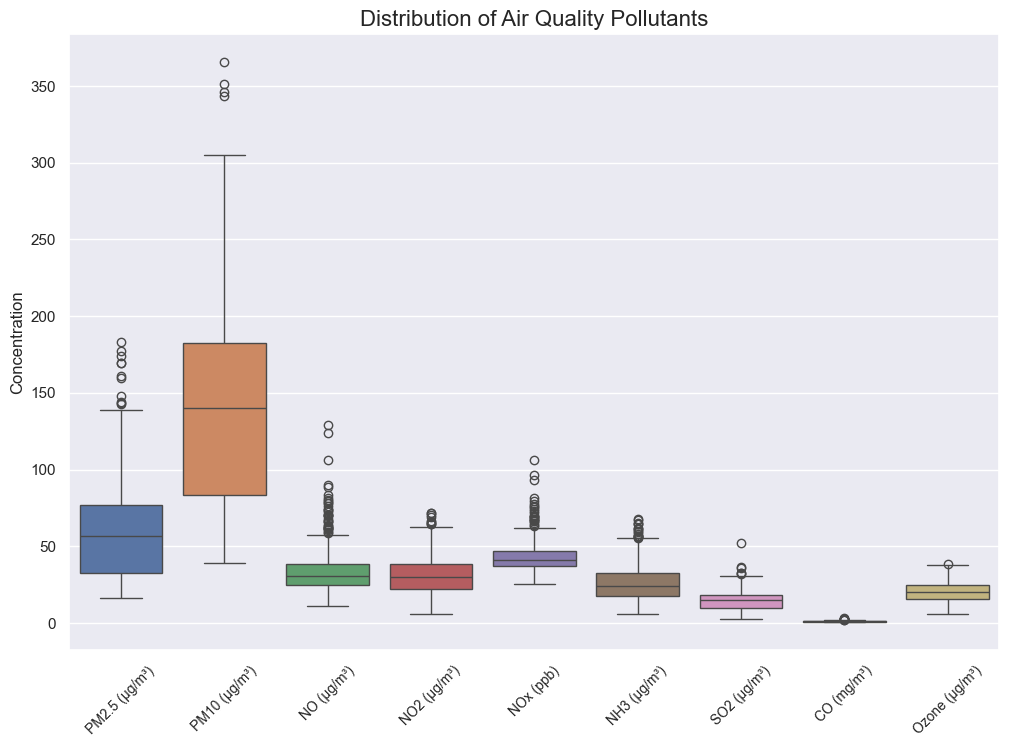

In [46]:
key_pollutants = finalDG.iloc[:,0:10]
plt.figure(figsize = (12,8))
sns.boxplot(data=key_pollutants)

plt.title("Distribution of Air Quality Pollutants", fontsize=16)
plt.ylabel("Concentration", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

## 2. Boxplot (Anand Vihar)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'PM2.5 (µg/m³)'),
  Text(1, 0, 'PM10 (µg/m³)'),
  Text(2, 0, 'NO (µg/m³)'),
  Text(3, 0, 'NO2 (µg/m³)'),
  Text(4, 0, 'NOx (ppb)'),
  Text(5, 0, 'NH3 (µg/m³)'),
  Text(6, 0, 'SO2 (µg/m³)'),
  Text(7, 0, 'CO (mg/m³)'),
  Text(8, 0, 'Ozone (µg/m³)')])

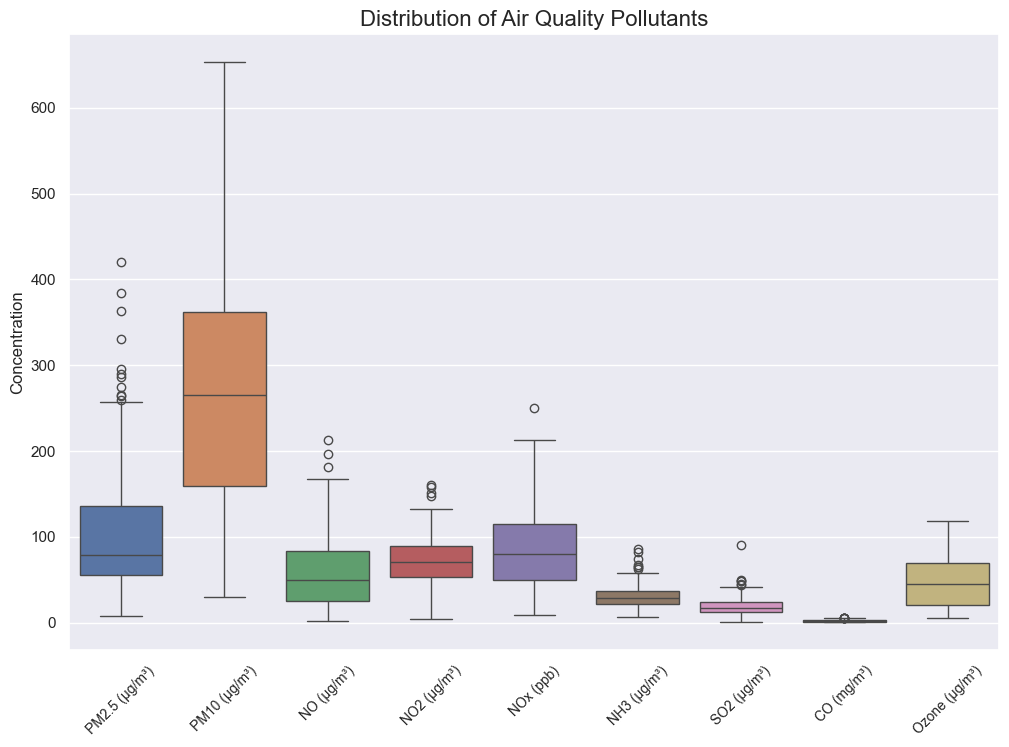

In [45]:
key_pollutants = finalAV.iloc[:,0:10]
plt.figure(figsize = (12,8))
sns.boxplot(data=key_pollutants)

plt.title("Distribution of Air Quality Pollutants", fontsize=16)
plt.ylabel("Concentration", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

## 3. Histograms (Dilshad Garden)

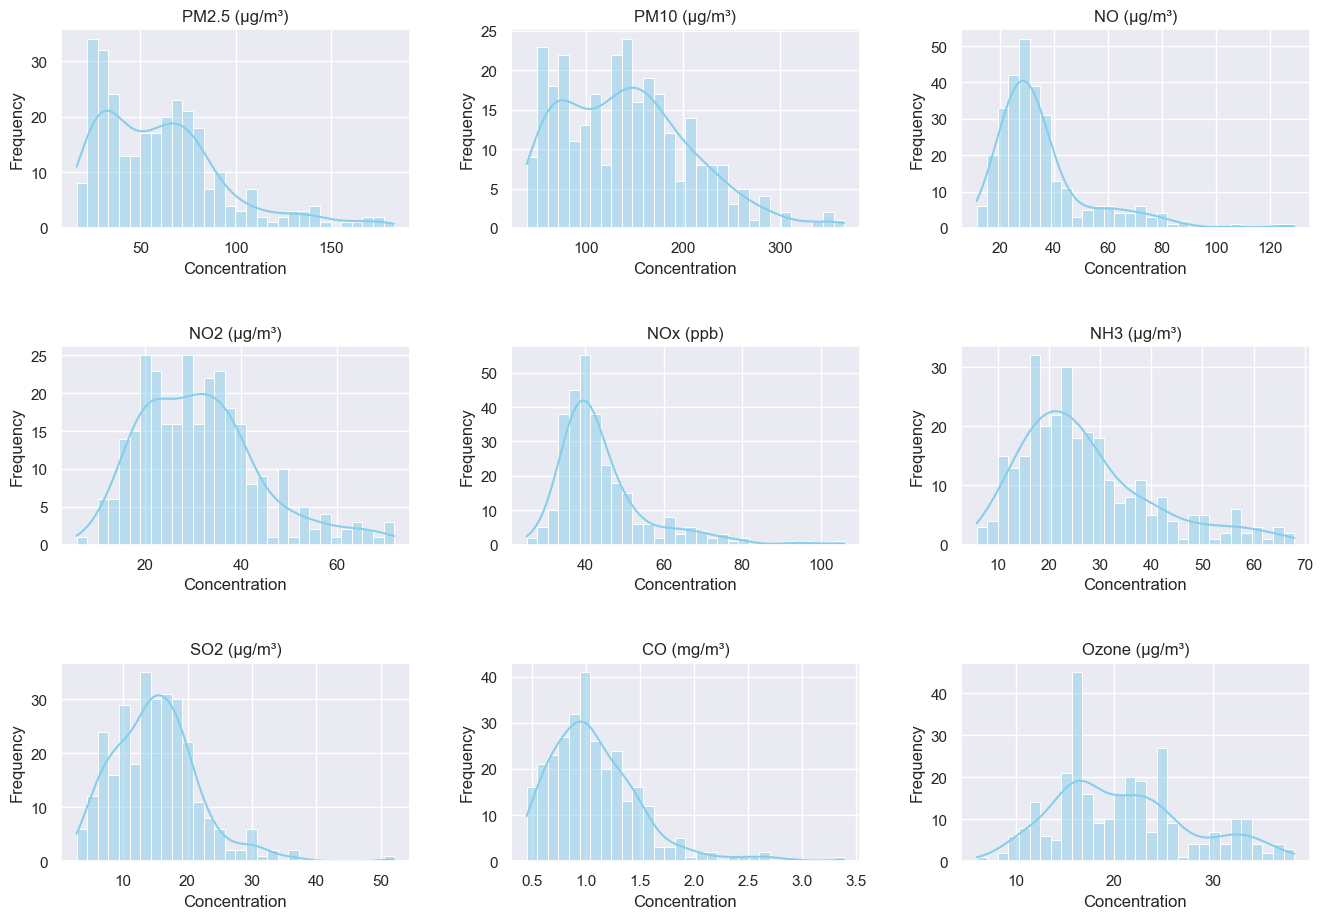

In [58]:
new = finalDG.iloc[:,1:10]

plt.figure(figsize=(14, 10))

for i, pollutant in enumerate(new.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(new[pollutant], bins=30, kde=True, color="skyblue")
    plt.title(pollutant)
    plt.xlabel("Concentration")
    plt.ylabel("Frequency")

plt.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)
plt.show()

## 4. Histograms (Anand Vihar)

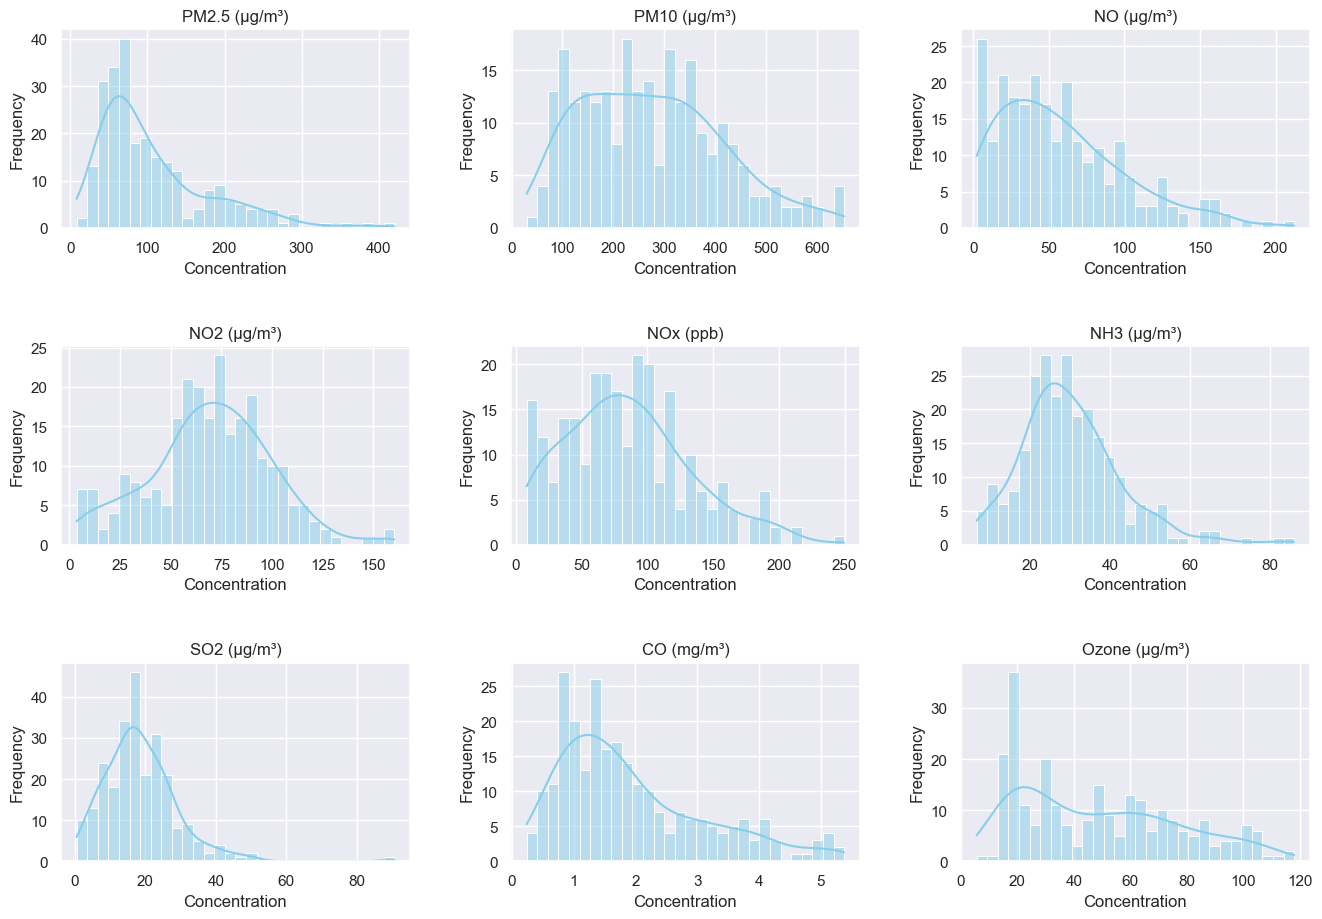

In [59]:
new = finalAV.iloc[:,1:10]

plt.figure(figsize=(14, 10))

for i, pollutant in enumerate(new.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(new[pollutant], bins=30, kde=True, color="skyblue")
    plt.title(pollutant)
    plt.xlabel("Concentration")
    plt.ylabel("Frequency")

plt.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)
plt.show()